[travanj -> Uskrs -> zečevi -> Fibonacci -> zlatni rez -> ?]

Napišite funkciju koja prima n (jednoznamenkast) i crta zlatnu spiralu kroz n kvadrata. (Primjer za n=10, samo bez dijela spirale kroz prva dva kvadrata, je na https://i.stack.imgur.com/eHWK9.png.) U kvadratima trebaju biti upisani odgovarajući Fibonaccijevi brojevi (bilo bi dobro da su različitih veličina i da ih spirala ne siječe, ali nije nužno). Kvadrati bi trebali biti različitih boja (odaberite colormap s tim svojstvom po volji). Orijentirajte spiralu kako želite (bilo bi dobro da joj je za svaki n širina veća od visine, ali nije nužno).

(Napominjem da "spirala" zapravo matematički nije spirala, već n spojenih četvrtinâ kruga.)

Testirajte funkciju pozivanjem sa svim jednoznamenkastim brojevima.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import pylab as pl

In [2]:
def fibonacci(n):
    lista = [0, 1]
    for i in range(2, n+1): #idemo od 0
        lista.append( lista[-2] + lista[-1] )
    return lista


In [3]:
def kvadrat(x,y,fn, col, i, ax):
    rect = patches.Rectangle((x,y),fn, fn,linewidth=1,edgecolor='red',facecolor=col);
    if fn > 1:
        plt.text( x + fn / 2, y + fn / 2, fn, fontsize=i+6)
    ax.add_patch(rect)


In [4]:
def circle(x, y, r, fi0, fi1, ax):
    t = np.linspace(fi0, fi1)
    ax.plot(x+r*np.cos(t), y+r*np.sin(t),color='black')

In [5]:
def slucaj(i, x, y, fn, fn_1, col, ax):
    if i == 0:
        y ,x = 0
    if i % 4 == 0:
        y = y + fn_1;
        circle(x+fn,y,fn, np.pi/2, np.pi, ax)
    if i % 4 == 1:
        y = y + fn_1 - fn
        x = x + fn_1
        circle(x, y,fn, 0, np.pi/2, ax)
    if i % 4 == 2:
        x = x + fn_1 - fn
        y = y - fn
        circle(x, y+fn,fn, -np.pi/2, 0, ax)
    if i % 4 == 3:
        x -= fn
        circle(x+fn,y+fn, fn, np.pi, 3*np.pi/2 ,ax)
    kvadrat(x, y, fn, col, i, ax)
    return x,y
    

In [6]:
def zlatni_rez( N = 10):
    fib=(fibonacci(N))
    fib.reverse()

    fig, ax = plt.subplots()

    ax.set_xlim(-1,fib[0]+fib[1]+1)
    ax.set_ylim(-1,fib[0]+1)

    rect = patches.Rectangle((0,0),fib[0]+fib[1], fib[0],linewidth=1,edgecolor='red',facecolor='none')
    ax.add_patch(rect)
    
    plt.axis('off')
    vs = np.random.randn(N)
    normal = pl.Normalize(vs.min(), vs.max())
    colors = pl.cm.jet(normal(vs))

    x,y =0,0
    #prvi kvadrat jos ispisat....
    kvadrat(0,0, fib[0], colors[-1], N+1, ax)
    circle(fib[0],y,fib[0], np.pi/2, np.pi, ax)
    for i in range(1, len(fib)-1):
        x,y = slucaj(i, x,y,fib[i], fib[i-1], colors[i], ax)
    




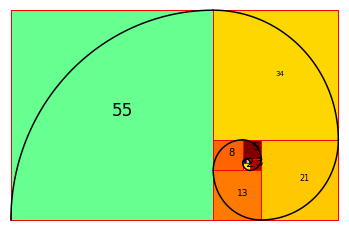

In [7]:
zlatni_rez()
